In [35]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
plt.rcParams['figure.figsize'] = (20, 10)

# Control 2: Transformaciones

Jerónimo Aranda 150344  
Emiliano Zambrano 157043  
Jorge Rotter  158391 

## 1
Utilice el Método Delta (aproximación en expansión en Series de Taylor, propagación del error), para justificar que si
\begin{align}
\sigma^{2}_{y}\propto [E(y)]^{3}
\end{align}
$g(y)=\frac{1}{\sqrt{y}}$, es la transformación que estabiliza la varianza. Esto es, $\sigma^{2}_{g}\propto constante$.

$Y$ es una variable aleatoria tal que $Var(y)=\sigma^{2}_{y}\propto [E(y)]^{3}$, sea $E(y)=\mu$. Asimismo, la función $g(y)$ es diferenciable, por lo tanto es razonable aproximar la función de distribución de $g(y)$ utilizando el Método Delta de propagación del error. Esto es, se puede aproximar linealmente la distribución de $g(y)$ de la siguiente manera:
\begin{align}
g(y)\approx g(\mu)+g'(\mu)(y-\mu)=\frac{1}{\sqrt{\mu}}-\frac{1}{2}\mu^{-\frac{3}{2}}(y-\mu)
\end{align}
De la anterior expresión, se sigue que la varianza de $g$ se puede aproximar como:

\begin{align}
Var(g(y))\approx \sigma^{2}_{y} g'(\mu)^{2}=\mu^{3} (-\frac{1}{2}\mu^{-\frac{3}{2}})^{2}=\frac{1}{4}\mu^{3}\mu^{-3}=\frac{1}{4}
\end{align}

De esta manera, se observa que $Var(g(y))\propto \frac{1}{4}$, por lo tanto es válido concluir que la transformación que estabiliza la varianza de una variable aleatoria con las anteriores características está dada por $g$.

## 2
Muestre que la transformación potencia de Box-Cox:
   \begin{equation}
  y^{(\lambda)} =
    \begin{cases}
      \frac{y^{\lambda}-1}{\lambda\dot{y}^{\lambda-1}}, & \lambda\neq 0\\
      \dot{y}logy, & \lambda=0
    \end{cases}       
\end{equation}
como función de $\lambda$, es continua en $\lambda=0$. En la expresión anterior, $\dot{y}=(\Pi^{n}_{i=1} y_{i})^{\frac{1}{n}}$ es el promedio geométrico de las respuestas $y_{i}$.

Para demostrar la continuidad en $\lambda=0$, se prueba que el límite cuando $\lambda$ tiende a 0 de la función $y^{\lambda}$, coincide con el valor de la función en 0, esto es:
\begin{align}
\displaystyle\lim_{\lambda \to 0} y^{(\lambda)}=y^{0}=\dot{y}logy
\end{align}

Se comienza con la siguiente igualdad.
\begin{align}
\displaystyle\lim_{\lambda \to 0} y^{(\lambda)}=\displaystyle\lim_{\lambda \to 0} \frac{y^{\lambda}-1}{\lambda\dot{y}^{\lambda-1}}
\end{align}
Sean $f(\lambda)=y^{\lambda}-1$ y $g(\lambda)=\lambda\dot{y}^{\lambda-1}$, es claro que f es una función diferenciable con respecto a $\lambda$, puesto que es una función exponencial menos una función constante; luego, g es el producto de una función lineal y una función exponencial, es decir es el producto de dos funciones diferenciables, por lo tanto g es también diferenciable. Asimismo, al ser diferenciables ambas funciones son continuas, esto es:
\begin{align}
&\displaystyle\lim_{\lambda \to 0}f(\lambda)=y^{0}-1=0 \\
&\displaystyle\lim_{\lambda \to 0}g(\lambda)=0\dot{y}^{0-1}=0
\end{align}
De esta manera, es claro que se tiene una indeterminación del tipo $\frac{0}{0}$ en el límite que se quiere calcular. También, ambas funciones en el cociente son diferenciables. Por lo tanto, el cálculo del límite se puede hacer a través de la Regla de L'Hôpital:
\begin{align}
&\displaystyle\lim_{\lambda \to 0}\frac{f(\lambda)}{g(\lambda)}=\displaystyle\lim_{\lambda \to 0}\frac{f'(\lambda)}{g'(\lambda)}
\end{align}

Se hace el cálculo de las derivadas:
\begin{align}
&f'(\lambda)=y^{\lambda}logy\\
&g'(\lambda)=\dot{y}^{\lambda-1}+\lambda\dot{y}^{\lambda-1}log\dot{y}
\end{align}
                                                                                                                    
Y se procede a calcular el límite del cociente:
\begin{align}
\displaystyle\lim_{\lambda \to 0}\frac{f'(\lambda)}{g'(\lambda)}=\displaystyle\lim_{\lambda \to 0}\frac{y^{\lambda}logy}{\dot{y}^{\lambda-1}+\lambda\dot{y}^{\lambda-1}log\dot{y}}=\frac{y^{0}logy}{\dot{y}^{-1}+0}=\frac{logy}{\dot{y}^{-1}}=\dot{y}logy
\end{align}

Se concluye que $\displaystyle\lim_{\lambda \to 0} y^{\lambda}=\dot{y}logy=y^{0}$, por lo tanto la función $y^{(\lambda)}$ es continua en $\lambda=0$.
                                                                                                                    
## 3 -  Estudio comparativo entre consumo de agua ($m^2/mes$) y consumo de energía eléctrica ($kw/hr$).
#### a) Grafique los datos y comente.
Leámos los datos:

In [36]:
datos=pd.read_csv('lista04.csv')
datos.head()

,obs.,c.elec,c.agua
0,1,0.16,3.756385
1,2,0.44,4.048329
2,3,0.63,4.255507
3,4,0.76,4.373823
4,5,1.04,4.506255


<center><b>Tabla 1.</b> datos</center>

Grafiquemos los datos:

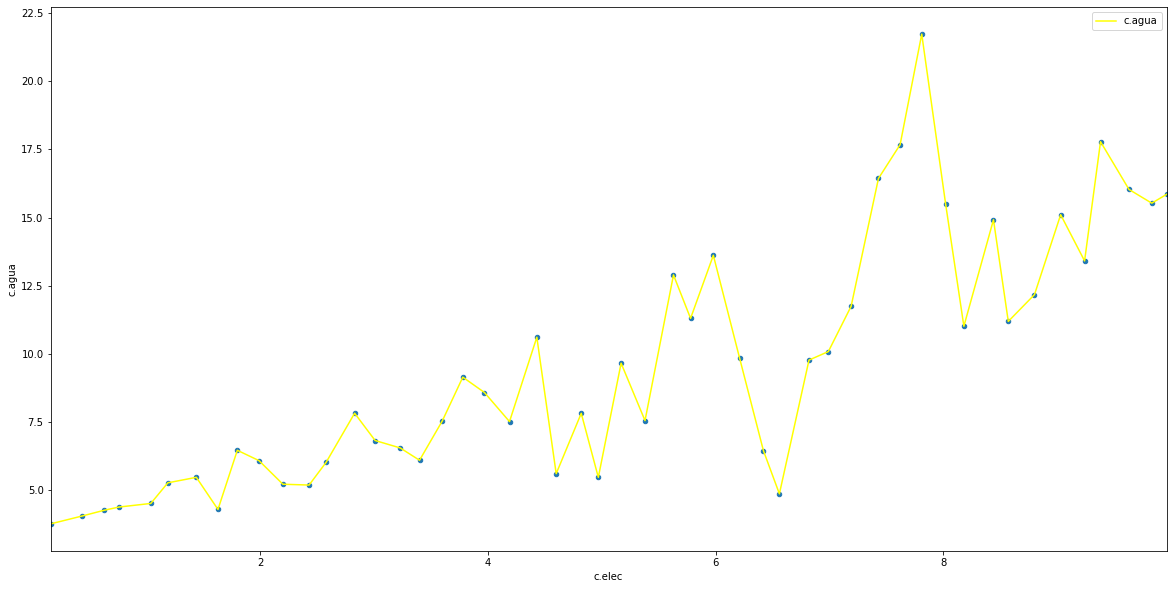

In [37]:
ax=datos.plot(x='c.elec',y='c.agua',color='yellow')
ax=datos.plot.scatter(x='c.elec',y='c.agua',ax=ax)

<center> <b>Figura 1.</b> c.elec vs.cagua </center>
<p>
Parece que una recta podría ser un buen candidato para modelar los datos sin embargo entre los 6 y 8 $kw/hr$ parece haber un incremento en la varianza de los datos a comparación de fuera del íntervalo $(6,8)$ $kw/hr$, decidimos graficar tambien las interpolaciones lineales entre las observaciones pues sin estas no se alcanzaba a apreciar el incremento en la varianza.

### b) Ajuste un modelo de regresión lineal simple sobre los datos sin transformar.

Ajustemos nuestro modelo lineal de la librería `sklearn`.

In [38]:
X=np.array(datos['c.elec'])
X=X.reshape((X.shape[0],1))
y=np.array(datos['c.agua'])
lm = linear_model.LinearRegression()
model = lm.fit(X,y)
Y=model.predict(X)
datos['modelo ajustado']=Y
datos.head()

,obs.,c.elec,c.agua,modelo ajustado
0,1,0.16,3.756385,3.092436
1,2,0.44,4.048329,3.457089
2,3,0.63,4.255507,3.704531
3,4,0.76,4.373823,3.873834
4,5,1.04,4.506255,4.238487


**Tabla 2.** Podemos observar que la columna `modelo ajustado` se anexó a nuestro dataframe.

Procedamos a graficar nuestro modelo ajustado:

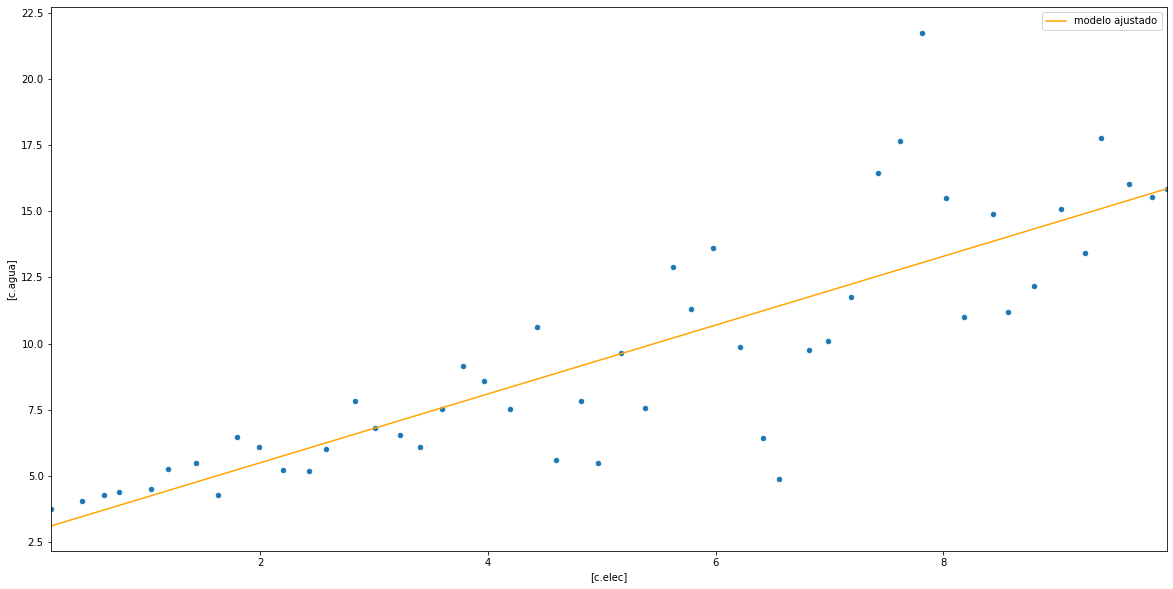

In [39]:
ax=datos.plot(x='c.elec',y='modelo ajustado',color='orange')
ax=datos.plot.scatter(x=['c.elec'],y=['c.agua'],ax=ax)

<center><b>Figura 2.</b> </center>
<p>
Con $\beta0$ dada por:

In [40]:
model.intercept_

2.8840631009090565

y $\beta1$ dada por:

In [41]:
model.coef_[0]

1.3023306632491367

#### 2.2.c) Verifique su modelo via análisis de residuales. Comente.
Procedamos al análisis de residuales.

La $R^2$ fue de:

In [42]:
model.score(X,y)

0.7086636247549499

70% de la variabilidad en los puntos quedó explicada en la recta de regresión. En la figura podemos ver que en efecto es en valores altos de consumo de energía que la recta no queda tan cerca de los puntos. 

In [43]:
datos.head()

,obs.,c.elec,c.agua,modelo ajustado
0,1,0.16,3.756385,3.092436
1,2,0.44,4.048329,3.457089
2,3,0.63,4.255507,3.704531
3,4,0.76,4.373823,3.873834
4,5,1.04,4.506255,4.238487


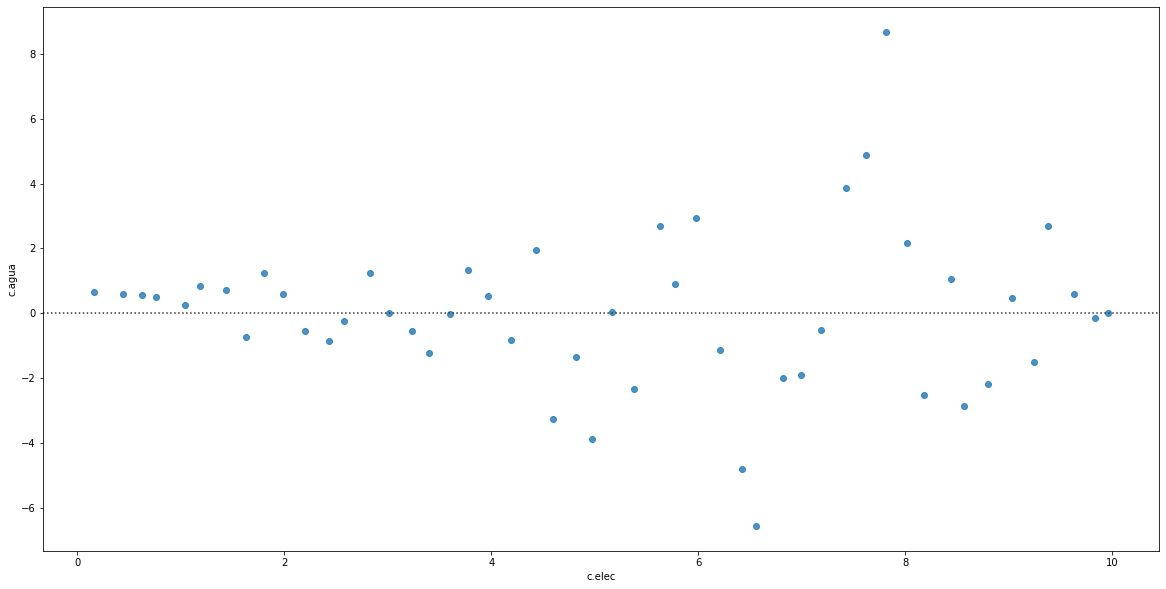

In [44]:
sns.residplot(x='c.elec', y='c.agua', data=datos)

<center><b>Figura 3.</b> Residuales</center>

En el gráfico de residuales (figura 3) se ve claro que el supuesto de homcedasticidad no se cumple, pues los residuales tienen forma de embudo porque la varianza es mayor en mayores valores de cconsumo eléctrico y sobre todo entre 6 y 8

#### d) Aplique la transformación Box-Cox.
Transformaremos la variable respuesta usando la transformación de **Box-Cox** como implementada en scikit-learn. Esto con suerte estabilizará la varianza.

In [45]:
(y_transformada,lambda_param,intervalo)=stats.boxcox(datos['c.agua'],alpha=.1)
datos['Transformacion Box-Cox']=y_transformada
datos.head()

,obs.,c.elec,c.agua,modelo ajustado,Transformacion Box-Cox
0,1,0.16,3.756385,3.092436,1.248115
1,2,0.44,4.048329,3.457089,1.314384
2,3,0.63,4.255507,3.704531,1.358327
3,4,0.76,4.373823,3.873834,1.382388
4,5,1.04,4.506255,4.238487,1.408494


**Tabla 3.** Se anexa a nuestro dataframe la respuesta ajustada.

En la llamada de nuestra función hemos establecido el parámetro `alpha=.1`, por esto hemos obtenido en la respuesta de `scipy.stats.boxcox()` un intervalo de $90$% de confianza, así como una recomendación para $\lambda$.

Veamos sus valores:

In [46]:
print(f'lambda={lambda_param}')

lambda=-0.08945735914365474


Este parámetro $\lambda$ esta dado por el valor que maximiza la función log-maximaverosimilitud.

In [47]:
print(f'El intérvalo de 90% de confianza es {intervalo}.')

El intérvalo de 90% de confianza es (-0.6393340049140158, 0.456559897011219).



### e) Grafique $y^{(\lambda)}$ vs. $x$:


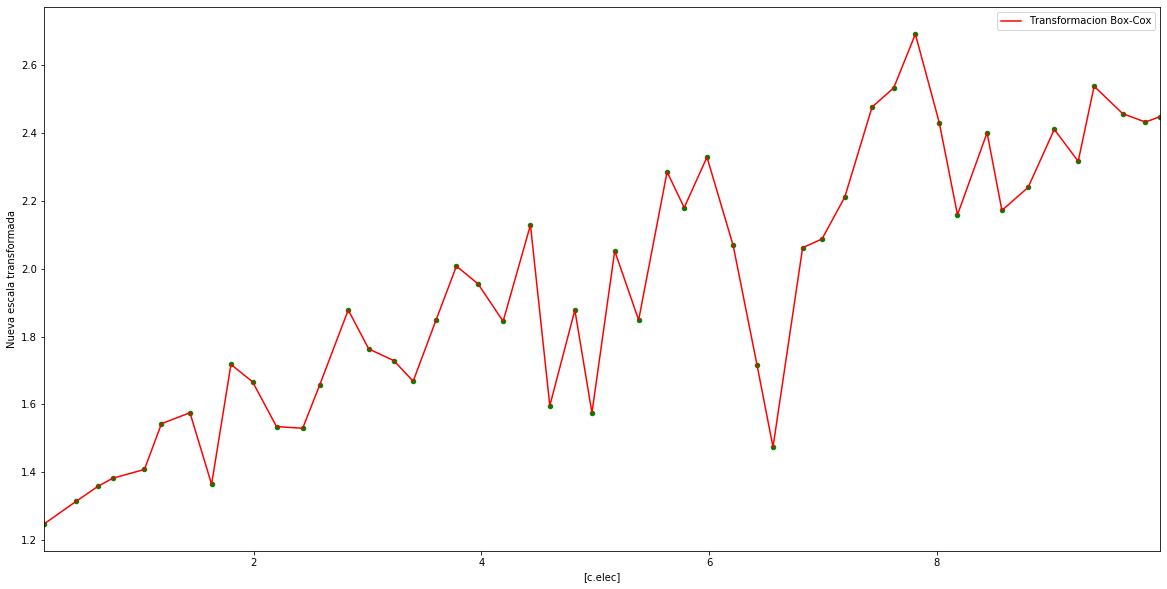

In [19]:
ax=datos.plot(x='c.elec',y='Transformacion Box-Cox',color='red')
ax=datos.plot.scatter(x=['c.elec'],y=['Transformacion Box-Cox'],ax=ax,color='green')
ax=ax.set_ylabel('Nueva escala transformada')

<center><b>Figura 4.</b> Respuesta transformada.</center>
<p>
Es interesante ver como parecen ser exactamente la misma gráfica, sin embargo, la escala de la respuesta se ha modificado. Es decir su escala cambió aunque parece ser un escalamiento lineal. Ahora veamos $y$ y $y^{(\lambda)}$ contra $x$, es decir, el consumo de agua y la posterior transformacion del consumo de agua por <b>Box-Cox</b> , contra $x$.

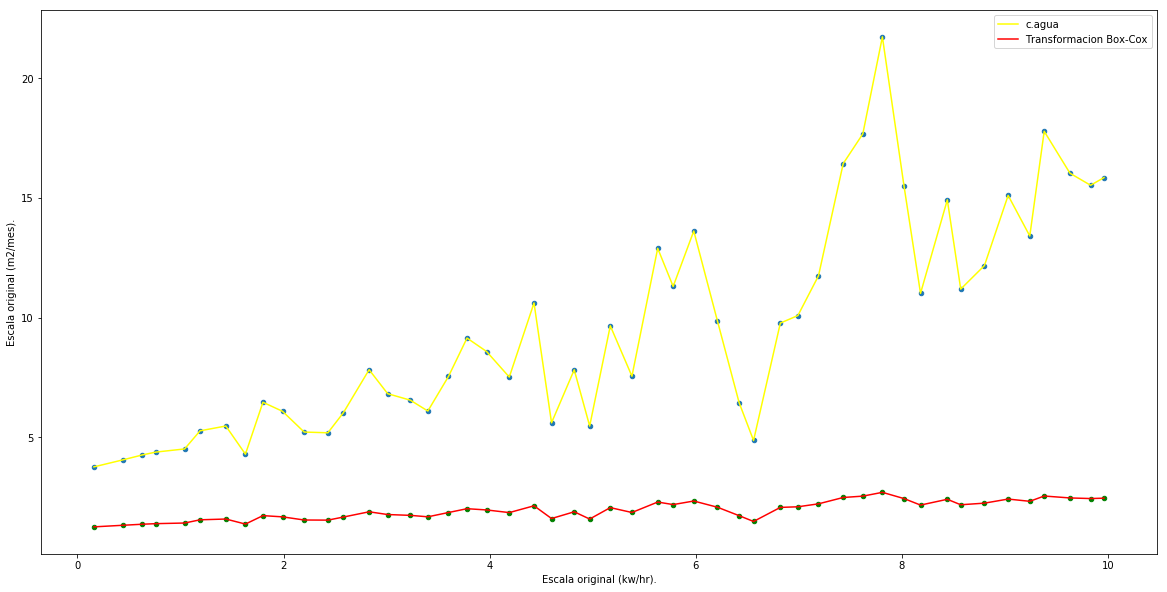

In [334]:
ax=datos.plot(x='c.elec',y='c.agua',color='yellow')
ax=datos.plot.scatter(x='c.elec',y='c.agua',ax=ax)
ax=datos.plot(x='c.elec',y='Transformacion Box-Cox',color='red',ax=ax)
ax=datos.plot.scatter(x=['c.elec'],y=['Transformacion Box-Cox'],ax=ax,color='green')
ax.set_ylabel('Escala original (m2/mes).')
label=ax.set_xlabel('Escala original (kw/hr).')

<center><b>Figura 5.</b> Respuesta y respuesta ajustada.</center>

Claramente si ajustamos un nuevo modelo lineal este tendrá una mucho menor $\beta1$. Además que parece que la varianza de la respuesta transformada se reduce. 
Otra manera de visualizar esta transformación es con los histogramas de ambas respuestas. Si nos fijamos en el histograma original del consumo de agua, es claro que no satisface el supuesto de normalidad.

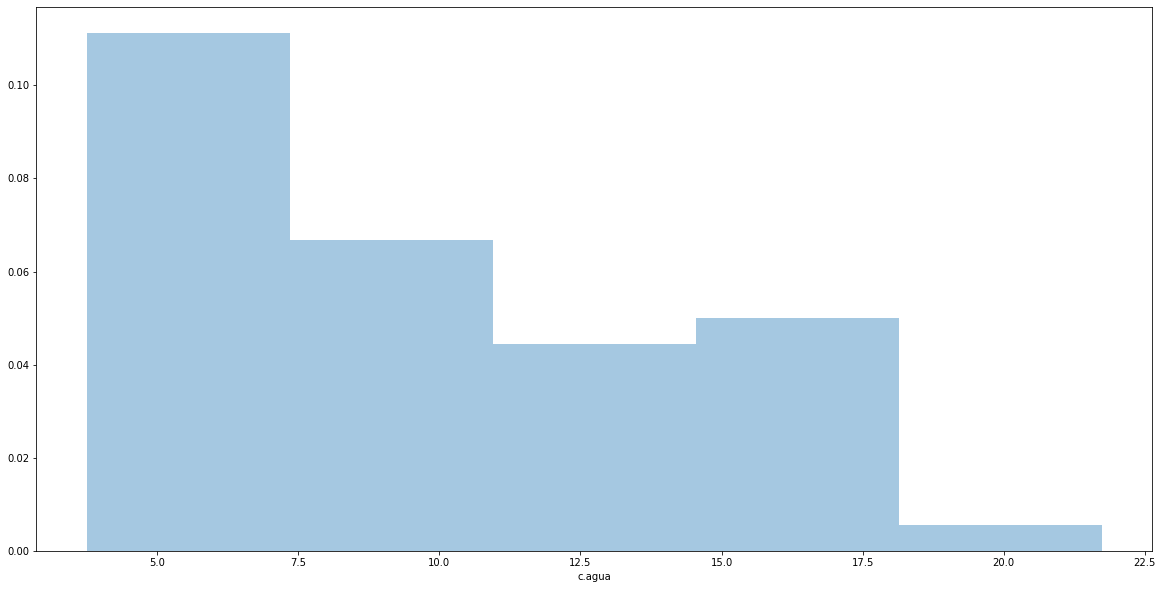

In [26]:
sns.distplot(datos['c.agua'], kde=False, norm_hist=True)

<center><b>Figura 6.</b> Histograma del consumo de agua antes de Box-Cox.</center>

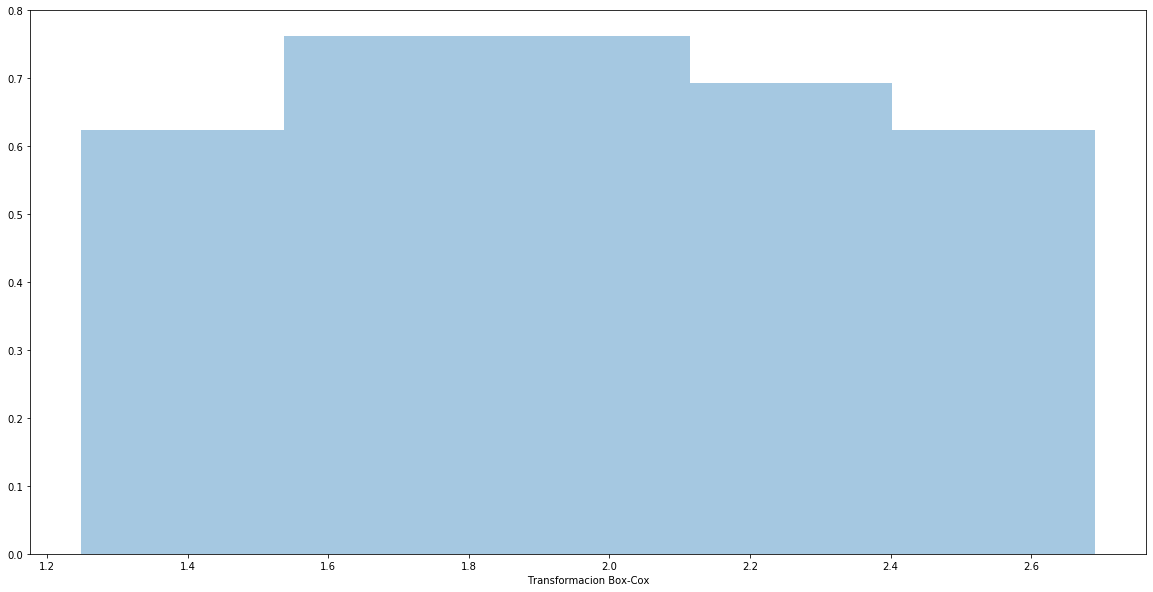

In [29]:
sns.distplot(datos['Transformacion Box-Cox'], kde=False, norm_hist=True)

<center><b>Figura 7.</b> histograma del consumo de agua transformado por Box-Cox.</center>

En las figuras 6 y 7 se aprecia que la transformación de Box-Cox hizo que los datos sean más simétricos, parecidos ahora sí a la normal que suponemos en la regresión.

#### f) Ajustar nuevo modelo lineal a la transformacion de la respuesta y validación del nuevo modelo:

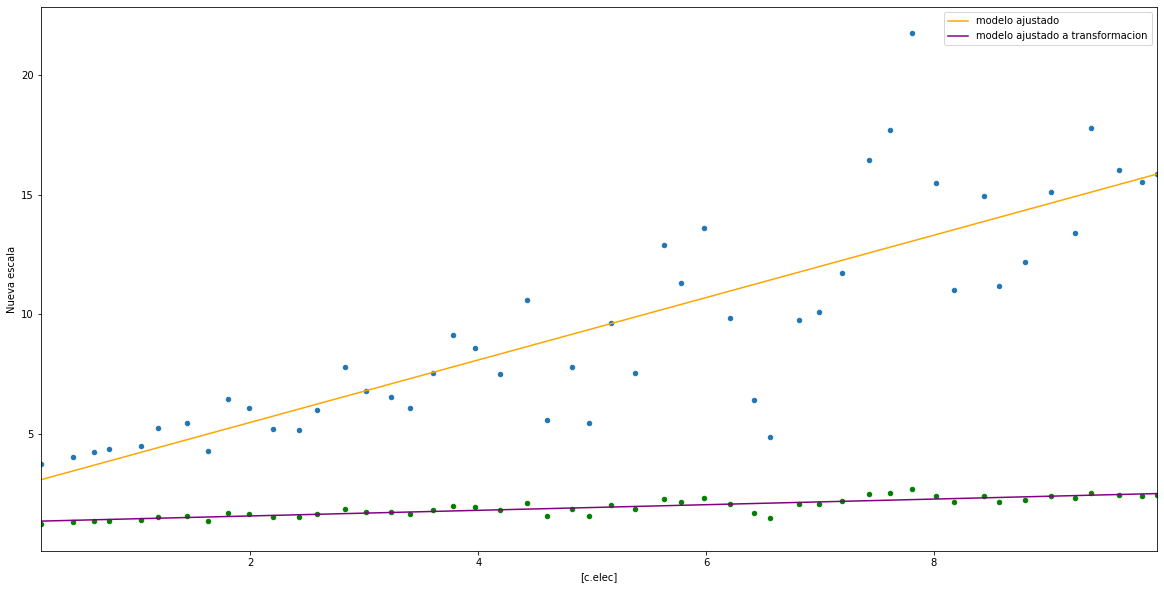

In [48]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y_transformada)
Y_transformada=model.predict(X)
datos['modelo ajustado a transformacion']=Y_transformada
ax=datos.plot(x='c.elec',y='modelo ajustado',color='orange')
ax=datos.plot.scatter(x=['c.elec'],y=['c.agua'],ax=ax)
ax=datos.plot(x='c.elec',y='modelo ajustado a transformacion',color='purple',ax=ax)
ax=datos.plot.scatter(x=['c.elec'],y=['Transformacion Box-Cox'],ax=ax,color='green')
ax=ax.set_ylabel('Nueva escala')

<center><b>Figura 8.</b> Ambos modelos ajustados</center>
El nuevo modelo con nueva $\beta_0$:

In [55]:
b0 = model.intercept_
b0

1.3448027189510587

y nueva $\beta1$:

In [56]:
b1 = model.coef_[0]
b1

0.11738692666281295

y $R^2$ de:

In [51]:
model.score(X,Y_transformada)

1.0

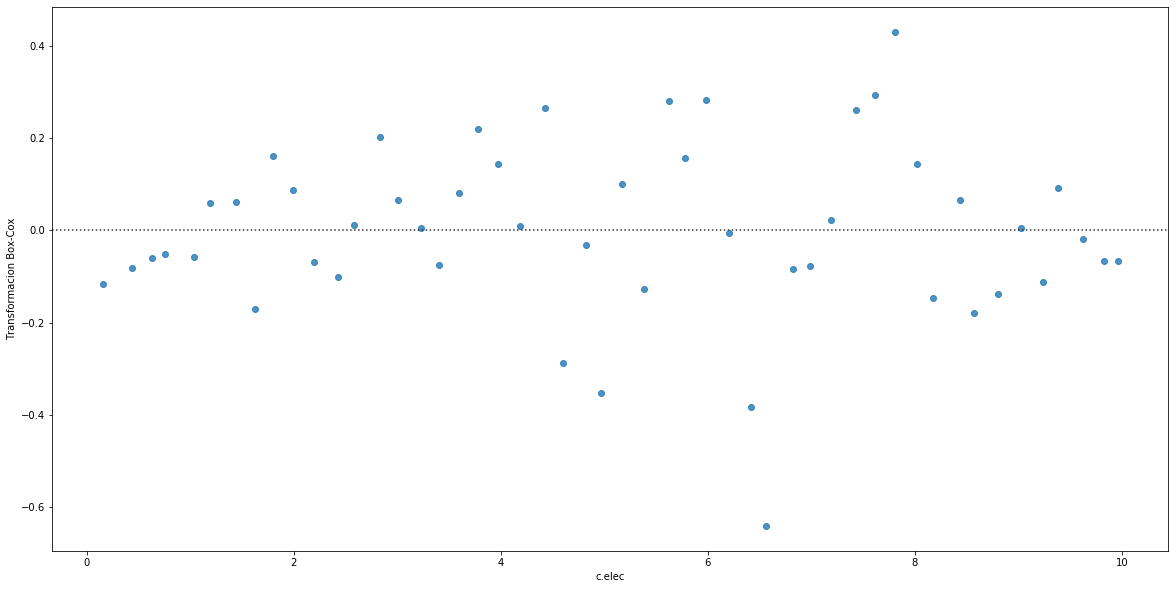

In [52]:
sns.residplot(x='c.elec', y='Transformacion Box-Cox', data=datos)

<center><b>Figura 9.</b> Residuales del modelo transformado.</center>

En este modelo casi toda la variabilidad en los puntos se ve explicado por la recta de regresión. La figura 9 muestra una distribución más aceptable de los residuales, pues hay que considerar que ahora todos los puntos están entre $-0.6$ y $0.4$, y la varianza se ve más homogenea que antes.

#### g) Construya un intervalo de confianza al 90% para el consumo medio esperado si el consumo de energía eléctrica es de $7.57\text{kw hr}^{-1}$

In [54]:
datos[datos['c.elec'] >7]

,obs.,c.elec,c.agua,modelo ajustado,Transformacion Box-Cox,modelo ajustado a transformacion
35,36,7.19,11.745444,12.247821,2.210910,2.188815
36,37,7.43,16.437777,12.560380,2.476536,2.216988
37,38,7.62,17.676945,12.807823,2.532929,2.239291
38,39,7.81,21.734911,13.055266,2.691293,2.261595
39,40,8.02,15.492684,13.328755,2.430318,2.286246
40,41,8.18,11.011651,13.537128,2.159008,2.305028
41,42,8.44,14.919955,13.875734,2.400789,2.335548
42,43,8.57,11.189384,14.045037,2.171918,2.350809
43,44,8.80,12.173039,14.344573,2.239550,2.377808
44,45,9.03,15.105626,14.644109,2.410495,2.404807


Ahora que la respuesta transformada satisface el supuesto de normalidad, podemos calcular un intervalo de confianza para el consumo medio esperado, que sigue (por la tarea 2, por ejemplo)

$$
\hat{y}^{(\lambda)}(x)\sim N\left(
    \beta_0+\beta_1x, 
    \sigma^2\left(\frac{1}{n}+\frac{(x-\bar{x})^2}{S_{xx}}\right)
    \right)
$$

por lo que podemos estimar la varianza $\sigma^2$ y usar la distribución $t$ asociada para dar un intervalo de la respuesta transformada $\hat{y}^{(\lambda)}$. 


Después, invirtiendo Box-Cox obtenríamos el intervalo para el consumo medio esperado

In [79]:
x = 7.57
yhat = b0+b1*x
sigmest = datos['c.elec'].std()
xbarr = datos['c.elec'].mean()
n = datos.shape[0]
sxx = np.sum((datos['c.elec']-xbarr)**2)
lower, upper = t.interval(alpha=0.1, df=n-1)
correccion = sigmest*np.sqrt(1/n + (x-xbarr)**2/sxx)

In [88]:
lower, upper = (yhat-correccion, yhat+correccion)

In [93]:
confint = inv_boxcox(np.array([lower, upper]), lambda_param)
confint

array([ 6.2563501 , 24.30522189])

In [90]:
from scipy.special import inv_boxcox

In [69]:
from scipy.stats import t

#### h)
Finalmente, usando 
$$
\hat{y}^{(\lambda)}(x)\sim N\left(
    \beta_0+\beta_1x, 
    \sigma^2\left(1+\frac{1}{n}+\frac{(x-\bar{x})^2}{S_{xx}}\right)
    \right)
$$

se tiene el intervalo de predicción

In [94]:
x = 5.1
yhat = b0+b1*x
sigmest = datos['c.elec'].std()
xbarr = datos['c.elec'].mean()
n = datos.shape[0]
sxx = np.sum((datos['c.elec']-xbarr)**2)
lower, upper = t.interval(alpha=0.05, df=n-1)
correccion = sigmest*np.sqrt(1+1/n + (x-xbarr)**2/sxx)

In [95]:
lower, upper = (yhat-correccion, yhat+correccion)
predint = inv_boxcox(np.array([lower, upper]), lambda_param)
predint

array([3.83467444e-01, 6.18096509e+02])

El intervalo de predicción es bastante más amplio por la variabilidad adicional de no suponer $x$ dado. Nótese también que ambos intervalos pierden su simetría al ser transformados de regreso, cosa que tiene sentido considerando que $\lambda$ es un parámetro no negativo.

## Conclusiones

Este ejemplo mostró la utilidad de las transformaciones de potencia para estabilizar la varianza cuando los datos no son homocedásticos para poder realizar regresión lineal. Las gráficas de residuales son una manera rápida de corroborar que los modelos se estén satisfaciendo y de tomar acción debida si no.

Pudimos haber utilizado $\log$ en vez de la $\lambda$ máximoverosimil, pero siempre y cuando regresemos a las unidades útiles en el problema que estamos tratando, la transformación de Box-Cox es una buena herramienta para trabajar con datos que a simple vista no parecen ser aptos para métodos lineales.

